In [1]:
import time
  
# store starting time
begin = time.time()

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread

# Directory Path

In [2]:
data_dir = Path(r'C:\Users\Admin\OneDrive\Desktop\JCOMP\pther')
data_dir2 = Path(r'C:\Users\Admin\OneDrive\Desktop\JCOMP\pther\fire-dataset')
data_dir3 = Path(r'C:\JCOMP\scrape')

# Path to train directory (Fancy pathlib...no more os.path!!)
train_dir = data_dir / 'fire_dataset'
print(train_dir)
train_dir2 = data_dir2/ 'train'
print(train_dir2)
train_dir3 = data_dir3/ 'simple_images'
print(train_dir2)

C:\Users\Admin\OneDrive\Desktop\JCOMP\pther\fire_dataset
C:\Users\Admin\OneDrive\Desktop\JCOMP\pther\fire-dataset\train
C:\Users\Admin\OneDrive\Desktop\JCOMP\pther\fire-dataset\train


# Storing dataset as objects

In [3]:
fire_cases_dir = train_dir / 'fire_images'
non_fire_cases_dir = train_dir / 'non_fire_images'
fire_cases_dir2 = train_dir2 / 'images'
non_fire_cases_dir2 = train_dir3 / 'orange_lights'
fire_cases_dir3 = train_dir3/ 'candle_fire'

# Get the list of all the images
fire_cases = fire_cases_dir.glob('*.png')
non_fire_cases = non_fire_cases_dir.glob('*.png')

fire_cases2 = fire_cases_dir2.glob('*.jpg')
non_fire_cases2 = non_fire_cases_dir2.glob('*.jpeg')

fire_cases3 = fire_cases_dir3.glob('*.jpeg')

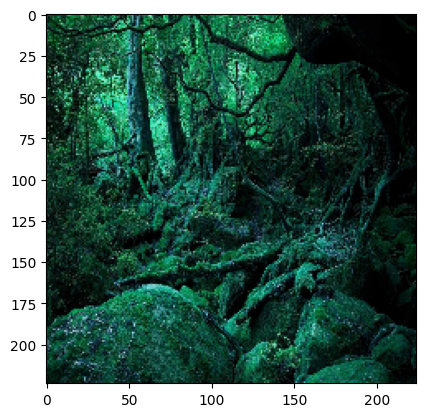

In [4]:
img = cv2.imread(r'C:\Users\Admin\OneDrive\Desktop\JCOMP\pther\fire_dataset\non_fire_images\non_fire.101.png')
# plt.imshow(img)
img = cv2.resize(img, (224,224))
plt.imshow(img)

In [5]:
from PIL import Image
import tensorflow as tf

In [6]:
# # Checking for bad images
# data = []
# for img in non_fire_cases:
#     # load the image, pre-process it, and store it in the data list
#     print(img)  #here I have printed the imagename
#     img = cv2.imread(str(img))
#     img = cv2.resize(img, (28, 28))   # 28, 28
#     img = tf.keras.utils.img_to_array(img)
#     data.append(img)

In [7]:
fire_cases

<generator object Path.glob at 0x0000027D4E60C740>

In [8]:
fire_cases2

<generator object Path.glob at 0x0000027D4E60CAC0>

# Multithreading library

In [9]:
import threading
print("available CPU cores:",os.cpu_count())

available CPU cores: 4


In [10]:
train_data = []

def fire_cases_t1():
    # Go through all the fire_cases . The label for these cases will be 0
    for img in fire_cases:
        train_data.append((img, 0))
    for img in fire_cases2:
        train_data.append((img, 0))
#     return 0;
        
# def non_fire_cases_t2():        
    # Go through all the non_fire_cases. The label for these cases will be 1
    for img in non_fire_cases:
        train_data.append((img,1))
    for img in non_fire_cases2:
        train_data.append((img,1))
    for img in fire_cases3:
        train_data.append((img,0))
    
    return 0;

if __name__ == "__main__":
    
    t1 = threading.Thread(target = fire_cases_t1)
#     t2 = threading.Thread(target = non_fire_cases_t2)

    t1.start()
#     t2.start()


    t1.join()  # stopping script till processes are executed
#     t2.join()


    # Get a pandas dataframe from the data we have in our list 
    train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

    # Shuffle the data 
    train_data = train_data.sample(frac=1.).reset_index(drop=True)
    samples = train_data

In [11]:
train_data
samples = train_data

In [12]:
train_data.shape

(1483, 2)

In [13]:
cases_count = train_data['label'].value_counts()
print(cases_count)

0    1187
1     296
Name: label, dtype: int64


# Bar plot of dataset

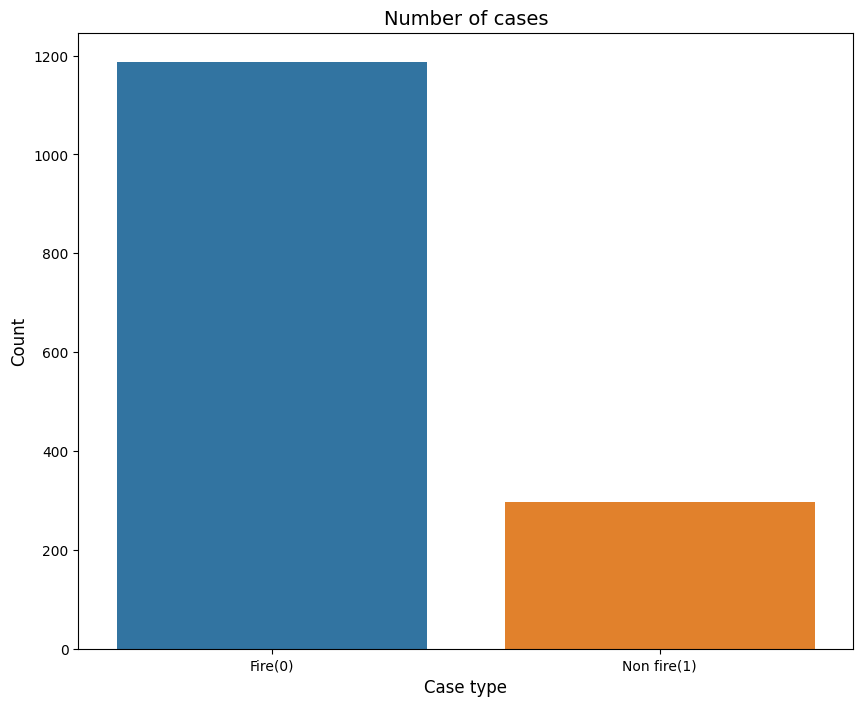

In [14]:
# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x = cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Fire(0)','Non fire(1)',])
plt.show()

In [15]:
fire_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()
non_fire_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()

# Concat the data in a single list and del the above two list
samples = fire_samples + non_fire_samples
del fire_samples, non_fire_samples

print(samples)

[WindowsPath('C:/Users/Admin/OneDrive/Desktop/JCOMP/pther/fire_dataset/fire_images/fire.501.png'), WindowsPath('C:/Users/Admin/OneDrive/Desktop/JCOMP/pther/fire-dataset/train/images/img (95).jpg'), WindowsPath('C:/Users/Admin/OneDrive/Desktop/JCOMP/pther/fire-dataset/train/images/small (119).jpg'), WindowsPath('C:/Users/Admin/OneDrive/Desktop/JCOMP/pther/fire_dataset/fire_images/fire.634.png'), WindowsPath('C:/Users/Admin/OneDrive/Desktop/JCOMP/pther/fire-dataset/train/images/img (65).jpg'), WindowsPath('C:/Users/Admin/OneDrive/Desktop/JCOMP/pther/fire_dataset/non_fire_images/non_fire.20.png'), WindowsPath('C:/Users/Admin/OneDrive/Desktop/JCOMP/pther/fire_dataset/non_fire_images/non_fire.239.png'), WindowsPath('C:/JCOMP/scrape/simple_images/orange_lights/orange lights_8.jpeg'), WindowsPath('C:/Users/Admin/OneDrive/Desktop/JCOMP/pther/fire_dataset/non_fire_images/non_fire.9.png'), WindowsPath('C:/Users/Admin/OneDrive/Desktop/JCOMP/pther/fire_dataset/non_fire_images/non_fire.151.png')]


# Sample Images

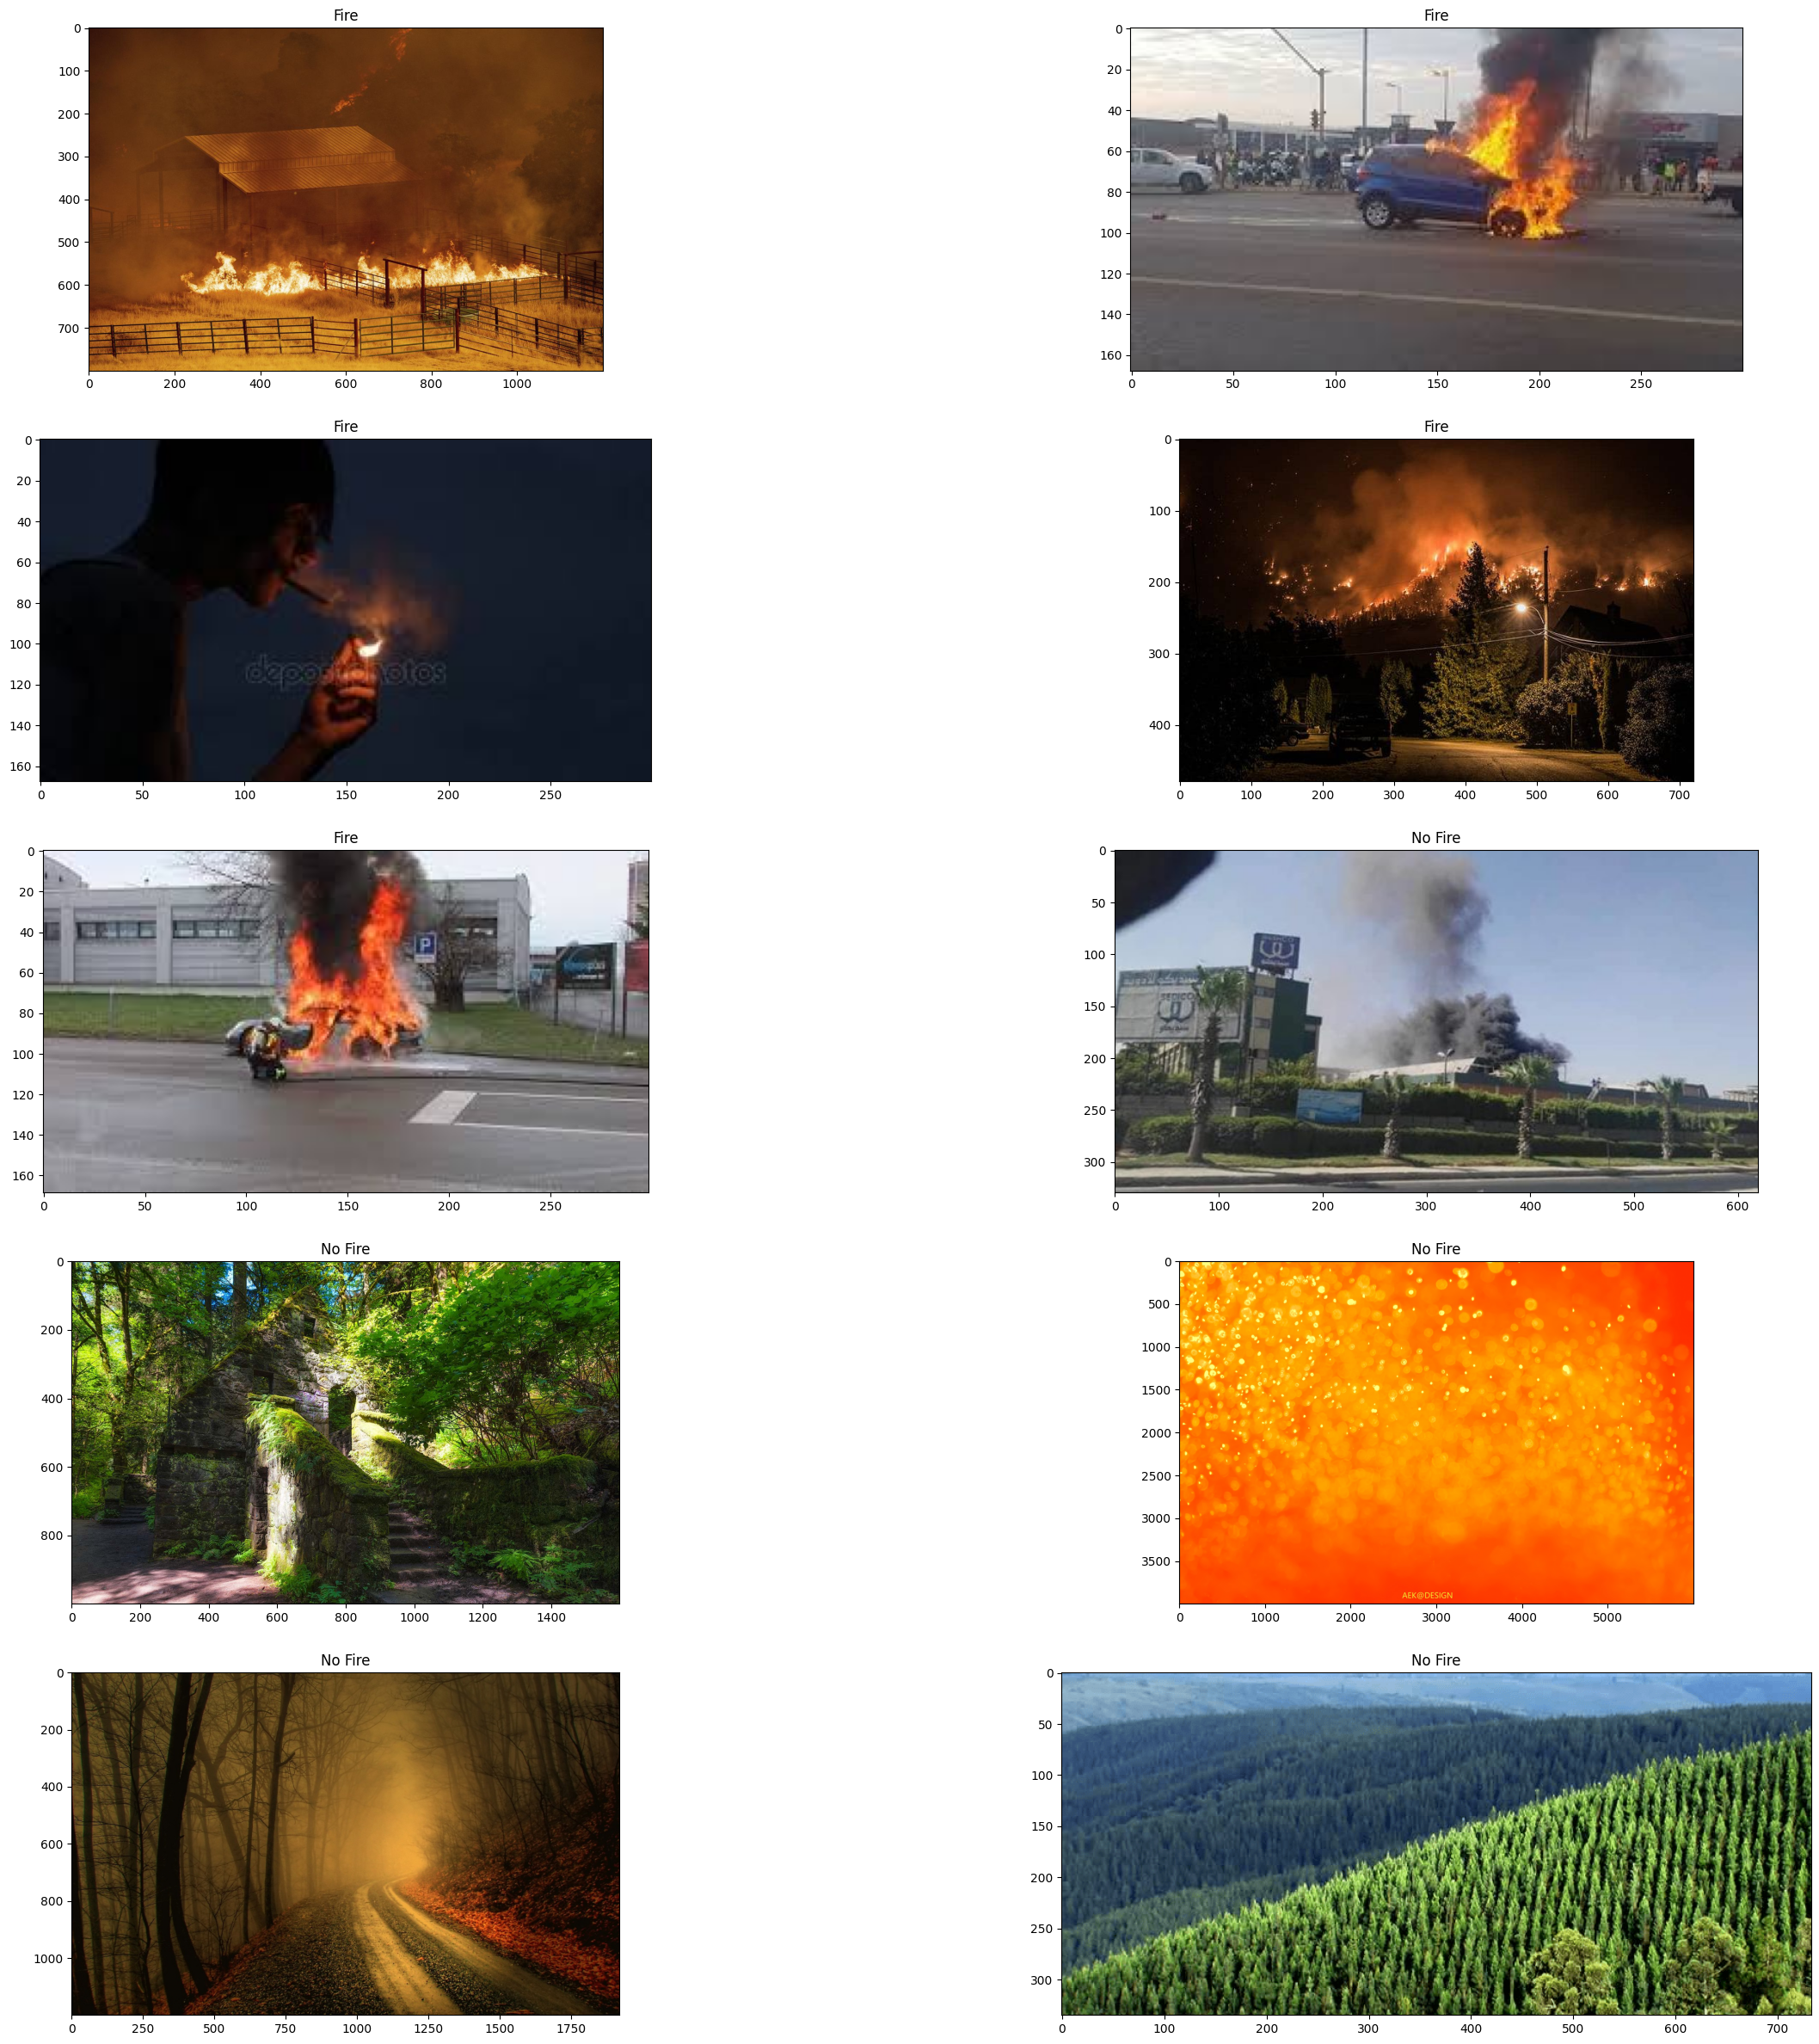

In [16]:
# Plot the data 
f, ax = plt.subplots(5,2, figsize=(30,30))
for i in range(10):
    img = imread(samples[i])
    ax[i//2, i%2].imshow(img, cmap='gray')
    if i<5:
        ax[i//2, i%2].set_title("Fire")
    elif i<10:
        ax[i//2, i%2].set_title("No Fire")
    
plt.show()

# Preprocessing and labelling

In [17]:
fire_cases_dir = train_dir / 'fire_images'
non_fire_cases_dir = train_dir / 'non_fire_images'
fire_cases_dir2 = train_dir2 / 'images'
non_fire_cases_dir2 = train_dir3 / 'orange_lights'

# Get the list of all the images
fire_cases = fire_cases_dir.glob('*.png')
non_fire_cases = non_fire_cases_dir.glob('*.png')

fire_cases2 = fire_cases_dir2.glob('*.jpg')
non_fire_cases2 = non_fire_cases_dir2.glob('*.jpeg')

train_data = []
train_labels = []

def fire_cases_t1():
    for img in fire_cases:
        img = cv2.imread(str(img))
        img = cv2.resize(img, (64,64))
        if img.shape[2] ==1:
            img = np.dstack([img, img, img])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img=np.array(img)
        img = img/255
        label = 'Fire'
        train_data.append(img)
        train_labels.append(label)
        
    for img in fire_cases2:
        img = cv2.imread(str(img))
        img = cv2.resize(img, (64,64))
        if img.shape[2] ==1:
            img = np.dstack([img, img, img])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img=np.array(img)
        img = img/255
        label = 'Fire'
        train_data.append(img)
        train_labels.append(label)

# def non_fire_cases_t2():
    for img in non_fire_cases:
        img = cv2.imread(str(img))
        img = cv2.resize(img, (64,64))
        if img.shape[2] ==1:
            img = np.dstack([img, img, img])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img=np.array(img)
        img = img/255
        label ='No Fire'
        train_data.append(img)
        train_labels.append(label)
        
    for img in non_fire_cases2:
        img = cv2.imread(str(img))
        img = cv2.resize(img, (64,64))
        if img.shape[2] ==1:
            img = np.dstack([img, img, img])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img=np.array(img)
        img = img/255
        label ='No Fire'
        train_data.append(img)
        train_labels.append(label)
        
    for img in fire_cases3:
        img = cv2.imread(str(img))
        img = cv2.resize(img, (64,64))
        if img.shape[2] ==1:
            img = np.dstack([img, img, img])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img=np.array(img)
        img = img/255
        label ='No Fire'
        train_data.append(img)
        train_labels.append(label)
    

if __name__ == "__main__":
    
    t1 = threading.Thread(target = fire_cases_t1)
#     t2 = threading.Thread(target = non_fire_cases_t2)

    t1.start()
#     t2.start()


    t1.join()  # stopping script till processes are executed
#     t2.join()

    train_data1 = np.array(train_data)
    train_labels1 = np.array(train_labels)

    print("Total number of validation examples: ", train_data1.shape)
    print("Total number of labels:", train_labels1.shape)

Total number of validation examples:  (1463, 64, 64, 3)
Total number of labels: (1463,)


In [18]:
train_data1.shape


(1463, 64, 64, 3)

In [19]:
train_labels1 = pd.DataFrame(train_labels1, columns=[ 'label'],index=None)
train_labels1.head()

label
0  Fire
1  Fire
2  Fire
3  Fire
4  Fire

In [20]:
train_labels1['label'].unique()


array(['Fire', 'No Fire'], dtype=object)

In [21]:
cases_count = train_labels1['label'].value_counts()
print(cases_count)

Fire       1167
No Fire     296
Name: label, dtype: int64


In [22]:
train_labels1['label']=train_labels1['label'].map({'Fire':0,'No Fire':1})

In [23]:
train_labels1


label
0         0
1         0
2         0
3         0
4         0
...     ...
1458      1
1459      1
1460      1
1461      1
1462      1

[1463 rows x 1 columns]

In [24]:
train_labels1.isnull().sum()


label    0
dtype: int64

## Using SMOTE for sampling data

In [25]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
train_rows=len(train_data1)
train_data1 = train_data1.reshape(train_rows,-1)
train_data2, train_labels2 = smt.fit_resample(train_data1, train_labels1)

0    1167
1    1167
Name: label, dtype: int64


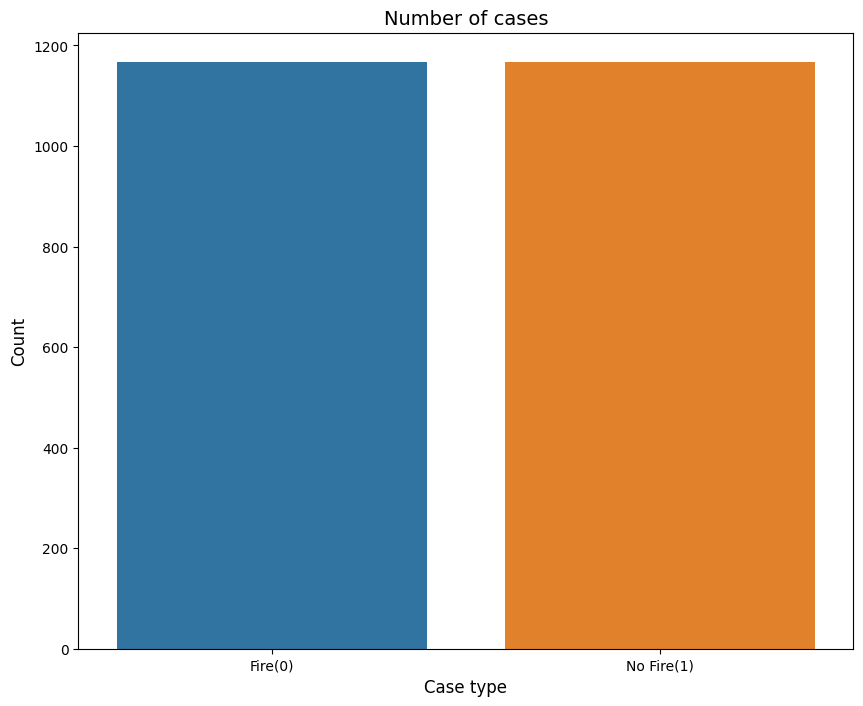

In [26]:
cases_count1 = train_labels2['label'].value_counts()
print(cases_count1)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count1.index, y= cases_count1.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Fire(0)','No Fire(1)'])
plt.show()

In [27]:
train_data2.shape


(2334, 12288)

In [28]:
train_labels2.shape


(2334, 1)

In [29]:
train_labels2['label'].value_counts()


0    1167
1    1167
Name: label, dtype: int64

In [30]:
train_data2 = train_data2.reshape(-1,64,64,3)


In [31]:
train_data2.shape

(2334, 64, 64, 3)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels2, test_size=0.2, random_state=42)

## Model creation and training

In [33]:
import tensorflow as tf
import datetime
from tensorflow.keras import  layers, models

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)) ,
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
Total params: 75,648
Trainable params: 75,648
Non-traina

In [34]:
model.add(layers.Flatten())
model.add(layers.Dense(640, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(264, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(2, activation='sigmoid'))
model.summary()
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(np.array(X_train), np.array(y_train), epochs=10, validation_data=(np.array(X_test), np.array(y_test)),callbacks=[tensorboard_callback])

Epoch 1/10
59/59 [==============================] - 37s 572ms/step - loss: 0.5174 - accuracy: 0.7509 - val_loss: 0.3950 - val_accuracy: 0.8544
Epoch 2/10
59/59 [==============================] - 30s 513ms/step - loss: 0.3588 - accuracy: 0.8731 - val_loss: 0.2643 - val_accuracy: 0.8972
Epoch 3/10
59/59 [==============================] - 25s 415ms/step - loss: 0.2667 - accuracy: 0.8875 - val_loss: 0.2214 - val_accuracy: 0.9101
Epoch 4/10
59/59 [==============================] - 24s 411ms/step - loss: 0.2098 - accuracy: 0.9159 - val_loss: 0.2947 - val_accuracy: 0.8972
Epoch 5/10
59/59 [==============================] - 27s 453ms/step - loss: 0.1864 - accuracy: 0.9357 - val_loss: 0.1809 - val_accuracy: 0.9315
Epoch 6/10
59/59 [==============================] - 26s 437ms/step - loss: 0.1593 - accuracy: 0.9405 - val_loss: 0.1351 - val_accuracy: 0.9529
Epoch 7/10
59/59 [==============================] - 23s 395ms/step - loss: 0.1031 - accuracy: 0.9641 - val_loss: 0.1420 - val_accuracy: 0.9550

In [36]:
# end = time.time()
# # total time taken
# print(f"Total runtime of the program is {end - begin}")

In [37]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

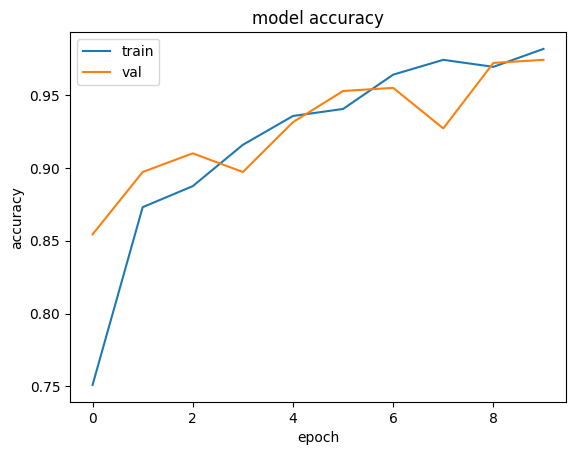

In [38]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

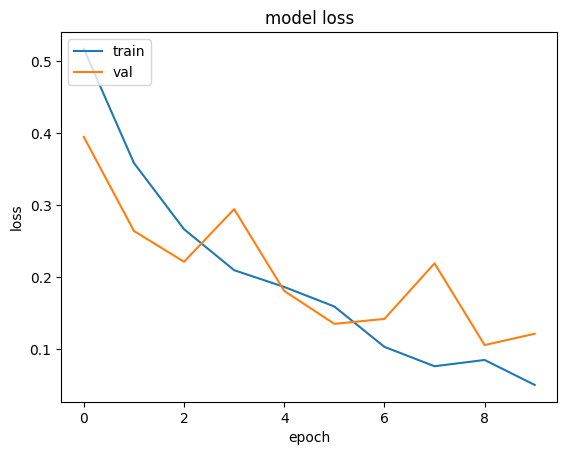

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import plot_model

In [ ]:
# Plot model graph
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

## Metrics

In [41]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss: {:.3f}".format(loss))
print("Test Accuracy: {:.3f}%".format(acc*100))

Test Loss: 0.121
Test Accuracy: 97.430%


In [49]:
# Predict
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)

print(pred[:5])

15/15 [==============================] - 1s 90ms/step
[0 1 1 0 1]


In [50]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr , tpr , thresholds = roc_curve ( y_test , pred)

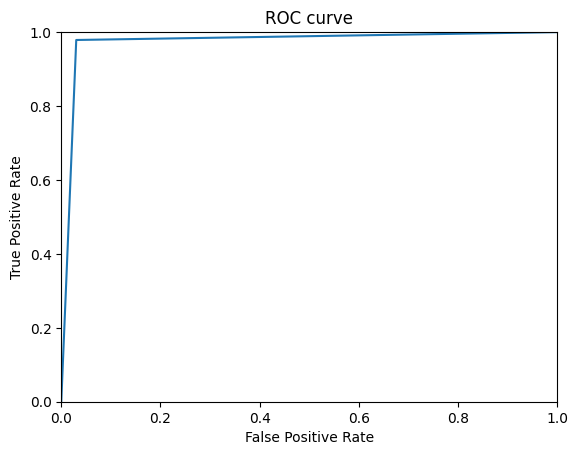

In [51]:
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.title('ROC curve')
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve (fpr,tpr) 

In [52]:
auc_score=roc_auc_score(y_test, pred)  #0.8822
auc_score

0.9742754952311078

In [20]:
print(classification_report(y_test, pred))

NameError: name 'y_test' is not defined

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [55]:
labels = {0: 'fire_images', 1: 'non_fire_images'}

## Confusion Matrix

In [56]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15, 7), text_size=10, norm=False, savefig=False): 
  # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] 
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
  
    # Label the axes
    ax.set(title="CNN Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes), 
         xticklabels=labels,
         yticklabels=labels)
  
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    plt.xticks(rotation=90, fontsize=text_size)
    plt.yticks(fontsize=text_size)

    threshold = (cm.max() + cm.min()) / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if norm:
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)
        else:
            plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    if savefig:
        fig.savefig("confusion_matrix.png")

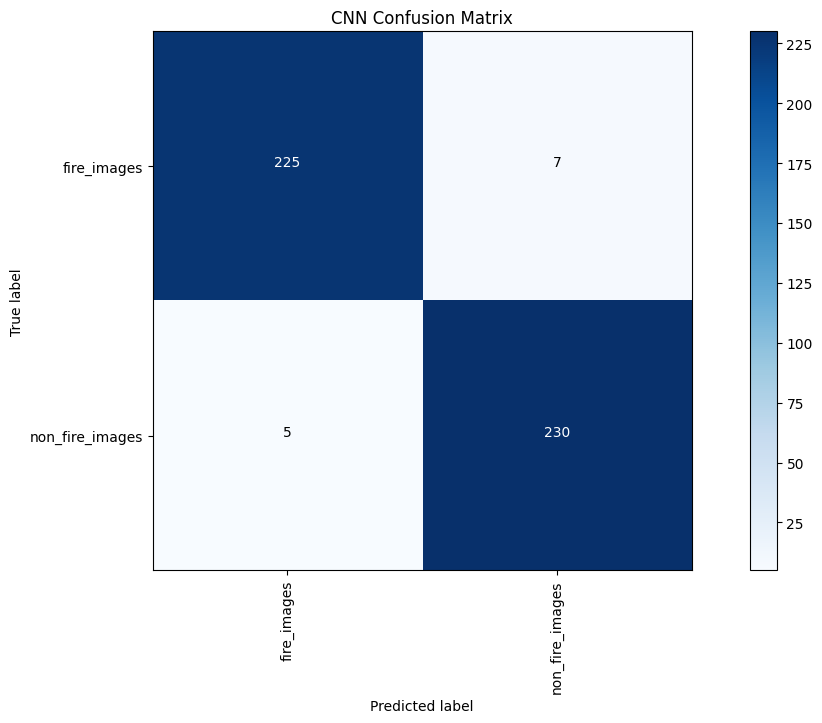

In [57]:
make_confusion_matrix(y_test, pred, list(labels.values()))

## Predictions on images not seen before

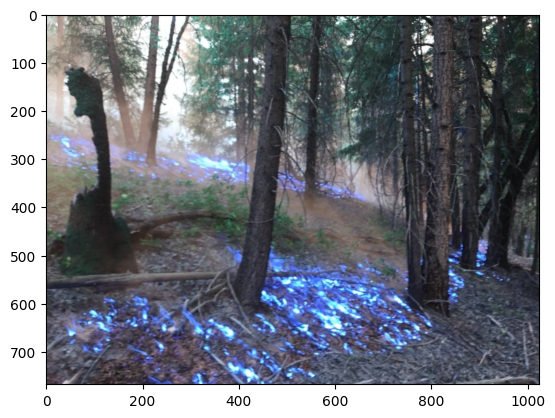

In [15]:
img = cv2.imread(str(r'C:\Users\Admin\OneDrive\Desktop\JCOMP\pther\fire_dataset\fire_images\fire.77.png'))
plt.imshow(img)

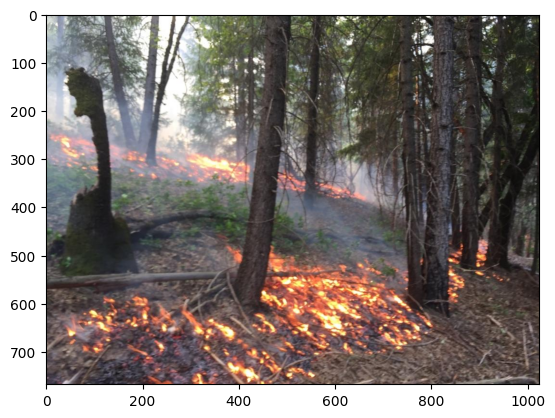

In [17]:
img = cv2.imread(str(r'C:\Users\Admin\OneDrive\Desktop\JCOMP\pther\fire_dataset\fire_images\fire.77.png'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

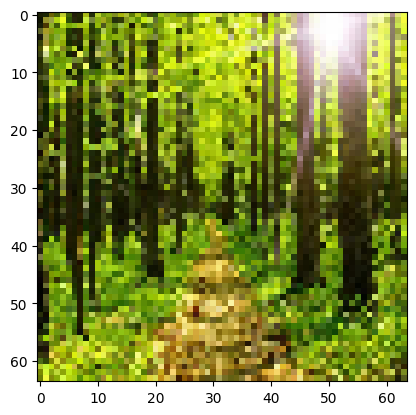

In [18]:
# Testing model with a fire image
pic=[]
img = cv2.imread(str(r'C:\JCOMP\scrape\simple_images\forest_suns\forest suns_10.jpeg'))
img = cv2.resize(img, (64,64))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=np.array(img)
img = img/255
#label = to_categorical(0, num_classes=2)
pic.append(img)

In [99]:
pic1 = np.array(pic)


In [100]:
a=model.predict(pic1)
a

1/1 [==============================] - 0s 74ms/step


array([[2.0815145e-04, 1.0000000e+00]], dtype=float32)

In [101]:
# model output: 0=Fire, 1=No fire
res = a.argmax()
if res == 0:
    print("Fire detected")
else:
    print("No fire detected")

No fire detected


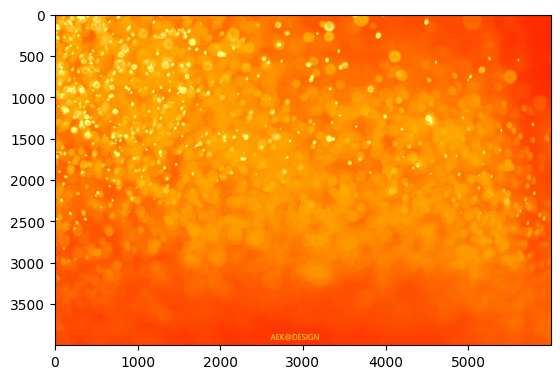

In [63]:
img = cv2.imread(str(r'C:\JCOMP\scrape\simple_images\orange_lights\orange lights_8.jpeg'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [64]:
# Testing model with a fire image
pic=[]
img = cv2.imread(str(r'C:\JCOMP\scrape\simple_images\orange_lights\orange lights_8.jpeg'))
img = cv2.resize(img, (64,64))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=np.array(img)
img = img/255
#label = to_categorical(0, num_classes=2)
pic.append(img)

In [65]:
pic1 = np.array(pic)


In [66]:
a=model.predict(pic1)
a

1/1 [==============================] - 0s 94ms/step


array([[0.34283784, 0.9348187 ]], dtype=float32)

In [67]:
# model output: 0=Fire, 1=No fire
res = a.argmax()
if res == 0:
    print("Fire detected")
else:
    print("No fire detected")

No fire detected


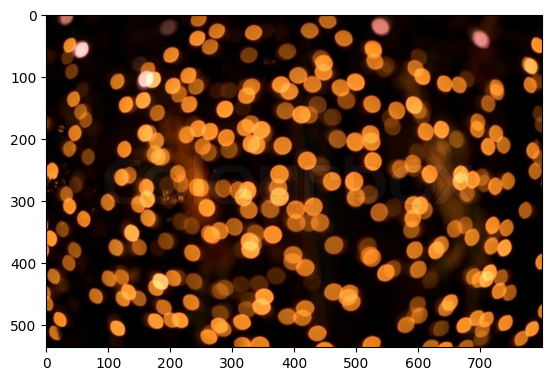

In [68]:
img = cv2.imread(str(r'C:\JCOMP\scrape\simple_images\sample.jpg'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [69]:
# Testing model with a fire image
pic=[]
img = cv2.imread(str(r'C:\JCOMP\scrape\simple_images\sample.jpg'))
img = cv2.resize(img, (64,64))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=np.array(img)
img = img/255
#label = to_categorical(0, num_classes=2)
pic.append(img)

In [70]:
pic1 = np.array(pic)


In [71]:
a=model.predict(pic1)
a

1/1 [==============================] - 0s 50ms/step


array([[0.06758381, 0.9996362 ]], dtype=float32)

In [72]:
# model output: 0=Fire, 1=No fire
res = a.argmax()
if res == 0:
    print("Fire detected")
else:
    print("No fire detected")

No fire detected


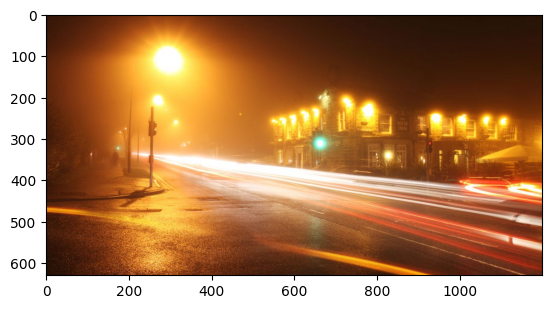

In [73]:
img = cv2.imread(str(r'C:\JCOMP\scrape\simple_images\orange_lights\orange lights_12.jpeg'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [74]:
# Testing model with a fire image
pic=[]
img = cv2.imread(str(r'C:\JCOMP\scrape\simple_images\orange_lights\orange lights_12.jpeg'))
img = cv2.resize(img, (64,64))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=np.array(img)
img = img/255
#label = to_categorical(0, num_classes=2)
pic.append(img)

In [75]:
pic1 = np.array(pic)


In [76]:
a=model.predict(pic1)
a

1/1 [==============================] - 0s 61ms/step


array([[0.5027558, 0.9202704]], dtype=float32)

In [77]:
# model output: 0=Fire, 1=No fire
res = a.argmax()
if res == 0:
    print("Fire detected")
else:
    print("No fire detected")

No fire detected


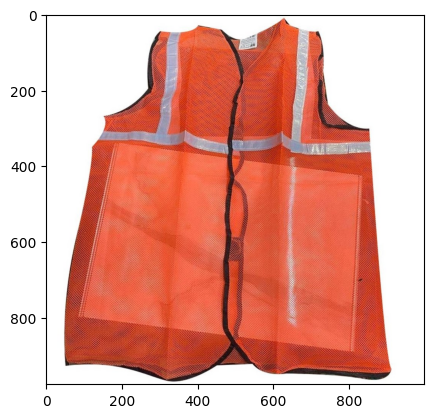

In [78]:
img = cv2.imread(str(r'C:\JCOMP\scrape\simple_images\orange_vests\orange vests_11.jpeg'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [79]:
# Testing model with a fire image
pic=[]
img = cv2.imread(str(r'C:\JCOMP\scrape\simple_images\orange_vest\orange vest_3.jpeg'))
img = cv2.resize(img, (64,64))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=np.array(img)
img = img/255
#label = to_categorical(0, num_classes=2)
pic.append(img)

In [80]:
pic1 = np.array(pic)


In [81]:
a=model.predict(pic1)
a

1/1 [==============================] - 0s 54ms/step


array([[0.17326686, 0.994013  ]], dtype=float32)

In [82]:
# model output: 0=Fire, 1=No fire
res = a.argmax()
if res == 0:
    print("Fire detected")
else:
    print("No fire detected")

No fire detected


In [ ]:
from tensorboard import notebook

In [ ]:
notebook.display(port=6006, height=1000)

In [ ]:
! pip install simple_image_download==0.4

In [71]:
cd\

C:\


In [72]:
cd JCOMP

C:\JCOMP


In [73]:
cd scrape

C:\JCOMP\scrape


In [74]:
!python img_scrap.py

[                                                                        ]   0%
[===                                                                     ]   5%
[=======                                                                 ]  10%
[==========                                                              ]  15%
[==============                                                          ]  20%
[==================                                                      ]  25%
[=====================                                                   ]  30%
[=========================                                               ]  35%
[============================                                            ]  40%
[================================                                        ]  45%
[====================================                                    ]  50%
[=======================================                                 ]  55%
[=======================================